In [1]:
# # python3 /home/rnb/Projects/rnb-planning/src/pkg/planning/filtering/lattice_model/shared_lattice_predictor.py --rtype panda

# import SharedArray as sa
# ROBOT_TYPE_NAME = 'panda'
# sa.delete("shm://{}.prepared".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.grasp_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.arm_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.rh_vals".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.result".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_in".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.response_out".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_quit".format(ROBOT_TYPE_NAME))

In [2]:
from __future__ import print_function
import os
import sys
RNB_PLANNING_DIR = os.environ["RNB_PLANNING_DIR"]
sys.path.append(os.path.join(RNB_PLANNING_DIR, 'src'))
from pkg.controller.combined_robot import *
from pkg.utils.utils import get_now, try_mkdir
import subprocess

DATA_PATH = os.path.join(RNB_PLANNING_DIR, "data")
try_mkdir(DATA_PATH)

DAT_ROOT = "stowing-deep"
TEST_DATA_PATH = os.path.join(DATA_PATH, DAT_ROOT)
try_mkdir(TEST_DATA_PATH)

IK_NUMS = [1,2,4,8,16,32,64]
RESULT_PATHS = []
for ik_num in IK_NUMS:
    RES_ROOT = "stowing-deep-result-new-lcheck-mvik{}".format(ik_num)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

HEADS = ["plan_time", "length", "MP_count", "failed_MPs", "IK_count", "failed_IKs", "success"]

def run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=['None', 'Tool', 'ToolReach', 'Full']):
    N_DAT = I_END-I_START
    ROBOT_DATA_ROOT = os.path.join(TEST_DATA_PATH, RTYPE)
    DATASET_PATH = os.path.join(ROBOT_DATA_ROOT, DAT_DIR)
    file_list = sorted(os.listdir(DATASET_PATH))

    gtimer = GlobalTimer.instance()
    gtimer.reset(scale=1, timeunit='s')

    gtimer.tic("full_loop")
    for fid in range(I_START, I_END):
        e_step_list = []
        for i_c, cname in enumerate(CNAME_LIST):
            gtimer.tic("step")
            p = subprocess.Popen(['python', '{}src/scripts/developing/pddlstream/test_saved_scene.py'.format(RNB_PLANNING_DIR),
                                  '--data_idx', str(fid), '--file_option', FILE_OPTION, '--cname', cname,]
                                 + common_args)
            p.wait()
            e_step = np.round(gtimer.toc("step"), 1)
            e_step_list.append(e_step)
            print("------- " + ("{:<8}"*len(e_step_list)).format(*e_step_list) + "-------", end="\r")

        print("")
        print("========== {} / {} (eta: {} / {} s) =========".format(
            fid+1, N_DAT, *np.round(gtimer.eta("full_loop", fid-I_START+1, N_DAT), 1)))

## Common params

In [3]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 10


CNAME_LIST = ['None']
# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 5
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = 30
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

# test loop

In [3]:
for ik_num, res_path in zip(IK_NUMS, RESULT_PATHS):
    common_args[common_args.index("--res_root")+1] = res_path
    common_args[common_args.index("--IK_TRY_NUM")+1] = str(ik_num)
    FILE_OPTION = "obj_1c_obs0"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

------- 2.2     -------
========== 1 / 10 (eta: 2.2 / 22.1 s) =========
------- 8.9     -------
========== 2 / 10 (eta: 11.2 / 55.8 s) =========
------- 7.2     -------
========== 3 / 10 (eta: 18.4 / 61.2 s) =========
------- 8.7     -------
========== 4 / 10 (eta: 27.1 / 67.7 s) =========
------- 2.1     -------
========== 5 / 10 (eta: 29.1 / 58.2 s) =========
------- 5.7     -------
========== 6 / 10 (eta: 34.9 / 58.1 s) =========
------- 2.0     -------
========== 7 / 10 (eta: 36.9 / 52.7 s) =========
------- 2.0     -------
========== 8 / 10 (eta: 38.9 / 48.6 s) =========
------- 3.7     -------
========== 9 / 10 (eta: 42.6 / 47.3 s) =========
------- 3.2     -------
========== 10 / 10 (eta: 45.8 / 45.8 s) =========
------- 2.2     -------
========== 1 / 10 (eta: 2.2 / 22.4 s) =========
------- 17.9    -------
========== 2 / 10 (eta: 20.1 / 100.7 s) =========
------- 7.3     -------
========== 3 / 10 (eta: 27.5 / 91.5 s) =========
------- 2.2     -------
========== 4 / 10 (eta: 29.

------- 7.1     -------
========== 3 / 10 (eta: 21.1 / 70.2 s) =========
------- 2.9     -------
========== 4 / 10 (eta: 24.0 / 60.0 s) =========
------- 7.1     -------
========== 5 / 10 (eta: 31.1 / 62.2 s) =========
------- 3.5     -------
========== 6 / 10 (eta: 34.6 / 57.7 s) =========
------- 6.8     -------
========== 7 / 10 (eta: 41.4 / 59.2 s) =========
------- 2.5     -------
========== 8 / 10 (eta: 44.0 / 55.0 s) =========
------- 9.1     -------
========== 9 / 10 (eta: 53.1 / 59.0 s) =========
------- 4.3     -------
========== 10 / 10 (eta: 57.4 / 57.4 s) =========
------- 3.5     -------
========== 1 / 10 (eta: 3.5 / 35.1 s) =========
------- 9.4     -------
========== 2 / 10 (eta: 12.9 / 64.3 s) =========
------- 3.0     -------
========== 3 / 10 (eta: 15.9 / 52.9 s) =========
------- 2.3     -------
========== 4 / 10 (eta: 18.2 / 45.5 s) =========
------- 2.7     -------
========== 5 / 10 (eta: 20.9 / 41.8 s) =========
------- 2.9     -------
========== 6 / 10 (eta: 23.

------- 2.3     -------
========== 5 / 10 (eta: 26.2 / 52.3 s) =========
------- 2.3     -------
========== 6 / 10 (eta: 28.5 / 47.5 s) =========
------- 2.6     -------
========== 7 / 10 (eta: 31.1 / 44.4 s) =========
------- 3.2     -------
========== 8 / 10 (eta: 34.3 / 42.9 s) =========
------- 2.8     -------
========== 9 / 10 (eta: 37.1 / 41.3 s) =========
------- 5.6     -------
========== 10 / 10 (eta: 42.7 / 42.7 s) =========
------- 2.7     -------
========== 1 / 10 (eta: 2.7 / 27.1 s) =========
------- 60.6    -------
========== 2 / 10 (eta: 63.4 / 316.8 s) =========
------- 4.8     -------
========== 3 / 10 (eta: 68.2 / 227.2 s) =========
------- 4.6     -------
========== 4 / 10 (eta: 72.8 / 181.9 s) =========
------- 3.6     -------
========== 5 / 10 (eta: 76.4 / 152.8 s) =========
------- 24.0    -------
========== 6 / 10 (eta: 100.4 / 167.4 s) =========
------- 14.0    -------
========== 7 / 10 (eta: 114.5 / 163.5 s) =========
------- 3.0     -------
========== 8 / 10 (

------- 15.0    -------
========== 7 / 10 (eta: 51.9 / 74.1 s) =========
------- 6.6     -------
========== 8 / 10 (eta: 58.5 / 73.1 s) =========
------- 3.8     -------
========== 9 / 10 (eta: 62.3 / 69.2 s) =========
------- 3.1     -------
========== 10 / 10 (eta: 65.5 / 65.5 s) =========
------- 106.2   -------
========== 1 / 10 (eta: 106.2 / 1062.1 s) =========
------- 8.2     -------
========== 2 / 10 (eta: 114.5 / 572.3 s) =========
------- 41.2    -------
========== 3 / 10 (eta: 155.6 / 518.7 s) =========
------- 17.8    -------
========== 4 / 10 (eta: 173.5 / 433.6 s) =========
------- 25.2    -------
========== 5 / 10 (eta: 198.7 / 397.4 s) =========
------- 5.3     -------
========== 6 / 10 (eta: 204.0 / 340.0 s) =========
------- 75.6    -------
========== 7 / 10 (eta: 279.6 / 399.4 s) =========
------- 8.5     -------
========== 8 / 10 (eta: 288.1 / 360.1 s) =========
------- 4.3     -------
========== 9 / 10 (eta: 292.4 / 324.9 s) =========
------- 63.1    -------
=======

------- 2.9     -------
========== 8 / 10 (eta: 89.7 / 112.1 s) =========
------- 2.2     -------
========== 9 / 10 (eta: 91.9 / 102.1 s) =========
------- 3.4     -------
========== 10 / 10 (eta: 95.3 / 95.3 s) =========
------- 2.5     -------
========== 1 / 10 (eta: 2.5 / 24.8 s) =========
------- 4.1     -------
========== 2 / 10 (eta: 6.6 / 33.1 s) =========
------- 5.1     -------
========== 3 / 10 (eta: 11.7 / 39.1 s) =========
------- 4.4     -------
========== 4 / 10 (eta: 16.1 / 40.3 s) =========
------- 3.8     -------
========== 5 / 10 (eta: 20.0 / 39.9 s) =========
------- 11.0    -------
========== 6 / 10 (eta: 31.0 / 51.7 s) =========
------- 7.9     -------
========== 7 / 10 (eta: 38.9 / 55.6 s) =========
------- 10.8    -------
========== 8 / 10 (eta: 49.7 / 62.2 s) =========
------- 9.2     -------
========== 9 / 10 (eta: 59.0 / 65.5 s) =========
------- 3.5     -------
========== 10 / 10 (eta: 62.5 / 62.5 s) =========
------- 44.9    -------
========== 1 / 10 (eta: 4

## plot results

In [4]:
from plot_scripts import *

RES_ROOT: stowing-deep-result-new-lcheck-mvik1
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik2
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik4
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik8
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik16
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik32
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik64
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']


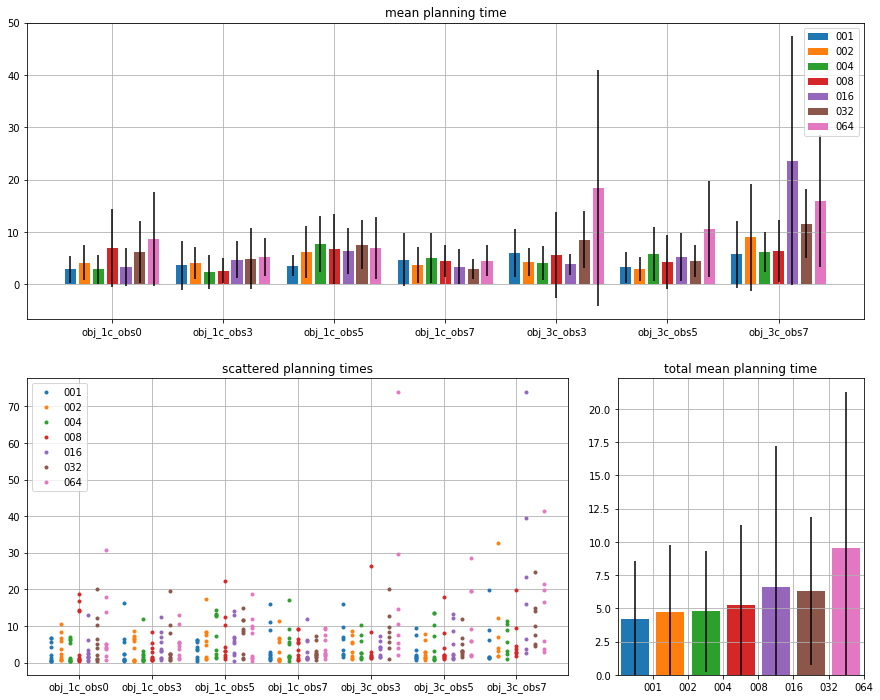

In [5]:
resdat_all_accum = defaultdict(dict)
CHECKERS = []
for ik_num in IK_NUMS:
    resdat_all, res_dict_all = print_results(RES_ROOT="stowing-deep-result-new-lcheck-mvik{}".format(ik_num), 
                                             RTYPE="panda", 
                                             DAT_DIR='20210917-113211',
                                             CNAMES_EXCLUDE=[], read_only=True
                                            )
    cname_cur = "{:03}".format(ik_num)
    CHECKERS.append(cname_cur)
    for key in resdat_all.keys():
        resdat_all_accum[key][cname_cur]=resdat_all[key]["None"]
    
plot_times(resdat_all_accum, CHECKERS=CHECKERS)

Text(0.5,1,'success ratios tot')

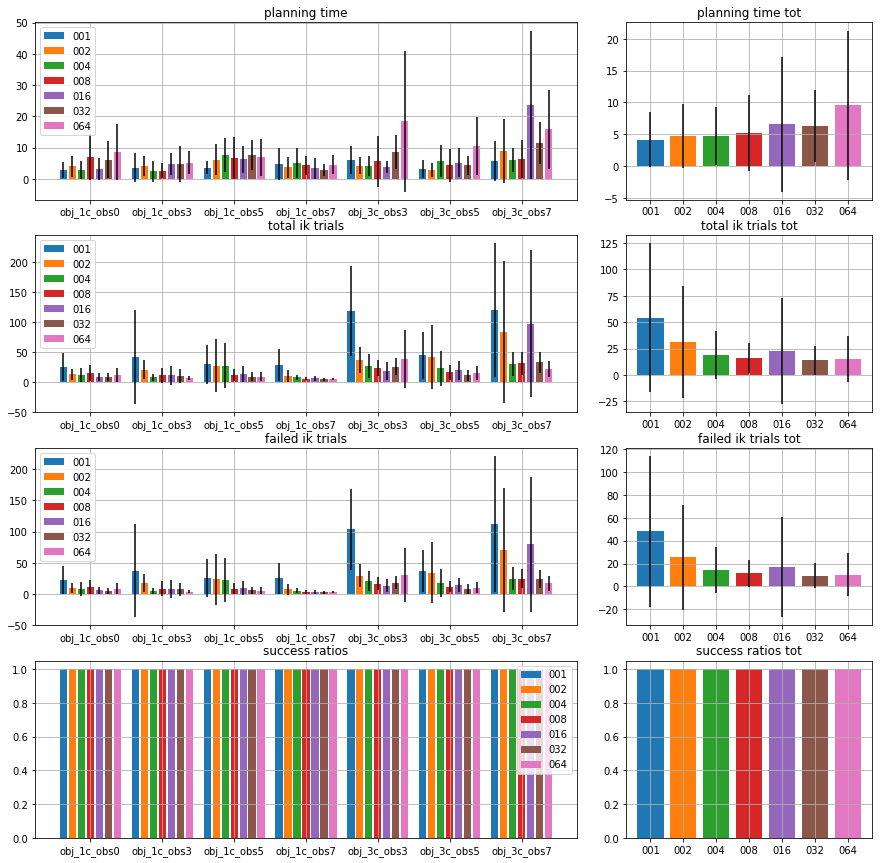

In [12]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_log(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS)
plt.title("planning time")
plt.subplot(4,3,3)
_ = plot_log(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_log(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS)
plt.title("total ik trials")
plt.subplot(4,3,6)
_ = plot_log(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS, average_all=True)
plt.title("total ik trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_log(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS)
plt.title("failed ik trials")
plt.subplot(4,3,9)
_ = plot_log(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS, average_all=True)
plt.title("failed ik trials tot")

plt.subplot(4,3,(10, 11))
_ = plot_log(resdat_all_accum, keys=["success"], CHECKERS=CHECKERS)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = plot_log(resdat_all_accum, keys=["success"], CHECKERS=CHECKERS, average_all=True)
plt.title("success ratios tot")

In [40]:
res['plan_time']

0.69069504737854